## Analyze containers dist

In [66]:
from copy import deepcopy
from tqdm import tqdm
import pandas as pd

BASE_TREASURE = 10000
N_PLAYERS = 10000

# Your suitcase data
starting_containers = [
    {"mult": 10, "inhab": 1,  'picks' : 0, 'density' : 0},
    {"mult": 80, "inhab": 6,  'picks' : 0, 'density' : 0},
    {"mult": 37, "inhab": 3,  'picks' : 0, 'density' : 0},
    {"mult": 17, "inhab": 1,  'picks' : 0, 'density' : 0},
    {"mult": 31, "inhab": 2,  'picks' : 0, 'density' : 0},
    {"mult": 50, "inhab": 4,  'picks' : 0, 'density' : 0},
    {"mult": 89, "inhab": 8,  'picks' : 0, 'density' : 0},
    {"mult": 73, "inhab": 4,  'picks' : 0, 'density' : 0},
    {"mult": 20, "inhab": 2,  'picks' : 0, 'density' : 0},
    {"mult": 90, "inhab": 10, 'picks' : 0, 'density' : 0}
]

for containers in starting_containers:
    containers['EV'] = (BASE_TREASURE * containers["mult"]) / containers["inhab"]


# Run Nash Simulation
containers = deepcopy(starting_containers)
total_picks = 0

for _ in tqdm(range(N_PLAYERS)):
    # Find best expected value and pick it
    containers[max(range(len(containers)), key=lambda i: containers[i]["EV"])]['picks'] += 1
    total_picks += 1

    # Recalculate densities and EVs
    for container in containers:
        container["density"] = (container["picks"] / total_picks) * 100
        container["EV"] = BASE_TREASURE * container["mult"] / (container["inhab"] + container["density"])

# Sort by density
containers = sorted(containers, key=lambda x: x["density"], reverse=True)

# Display as DataFrame
pd.DataFrame(containers)


100%|██████████| 10000/10000 [00:00<00:00, 243890.33it/s]


,mult,inhab,picks,density,EV
0,89,8,1724,17.24,35261.489699
1,73,4,1671,16.71,35248.672139
2,80,6,1669,16.69,35257.822829
3,90,10,1553,15.53,35252.643948
4,50,4,1018,10.18,35260.930889
5,37,3,750,7.50,35238.095238
6,31,2,680,6.80,35227.272727
7,17,1,383,3.83,35196.687371
8,20,2,368,3.68,35211.267606
9,10,1,184,1.84,35211.267606


### Sort by mult and plot density (expected nash, first ev, and real)

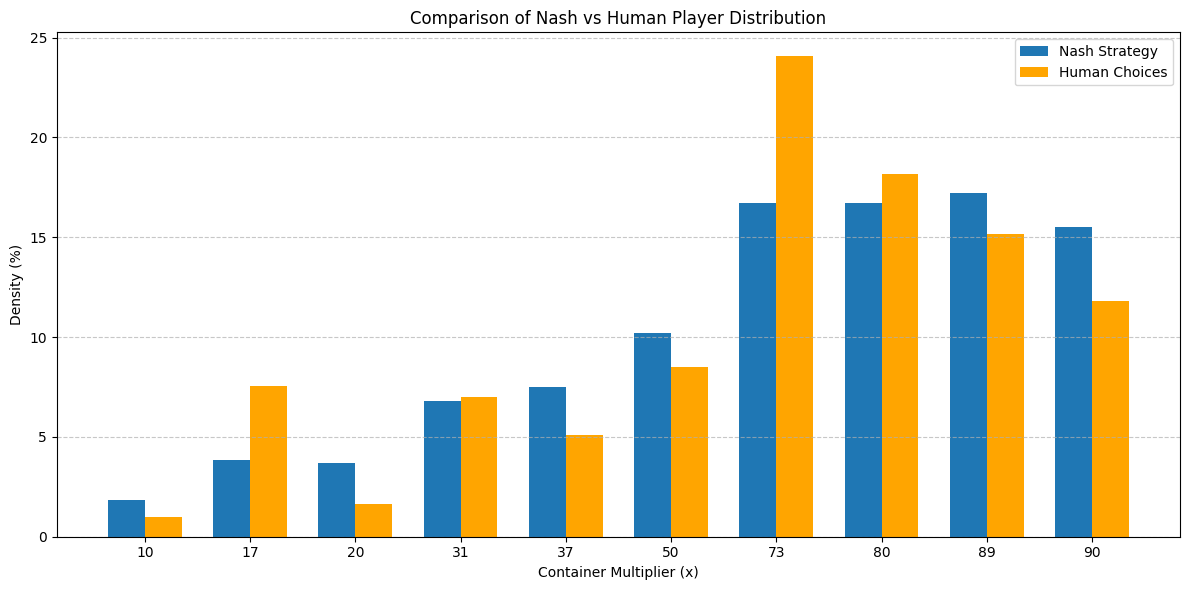

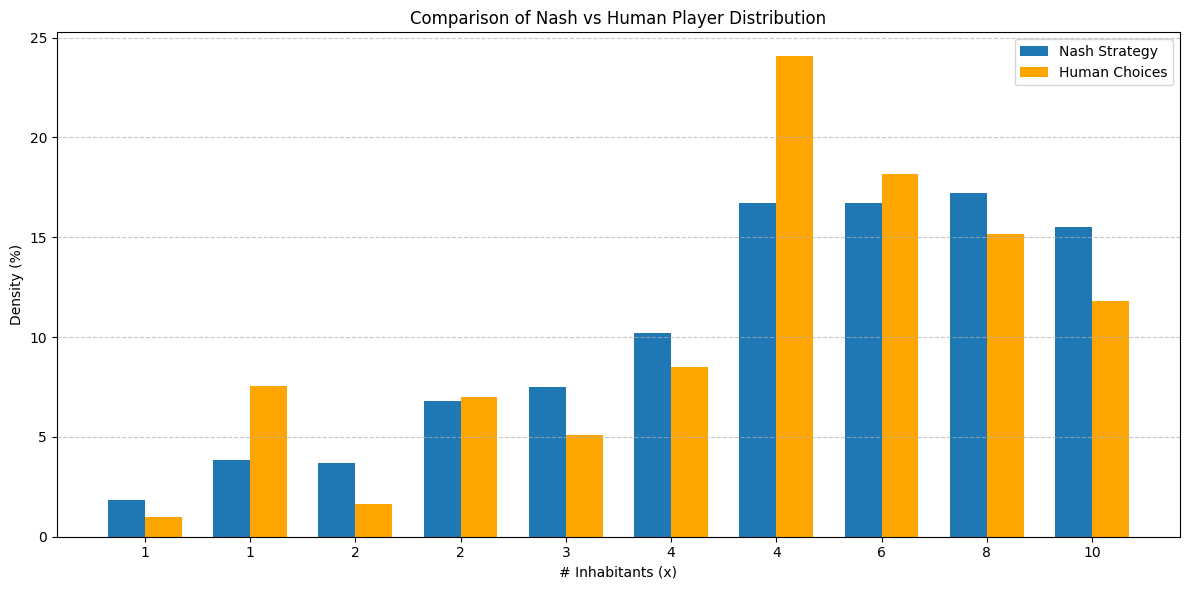

In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# === Human Distribution (from uploaded data) ===
human_data = [
    {"mult": 10, "inhab": 1, "density": 0.998},
    {"mult": 17, "inhab": 1, "density": 7.539},
    {"mult": 20, "inhab": 2, "density": 1.614},
    {"mult": 31, "inhab": 2, "density": 6.987},
    {"mult": 37, "inhab": 3, "density": 5.118},
    {"mult": 50, "inhab": 4, "density": 8.516},
    {"mult": 73, "inhab": 4, "density": 24.060},
    {"mult": 80, "inhab": 6, "density": 18.178},
    {"mult": 89, "inhab": 8, "density": 15.184},
    {"mult": 90, "inhab": 10, "density": 11.807},
]

# === Convert to DataFrames for easier handling ===
df_nash = pd.DataFrame(containers).sort_values("mult")
df_human = pd.DataFrame(human_data).sort_values("mult")
# === Add Base EV-based Strategy ===
df_base_ev = df_human.copy()
df_base_ev["base_ev"] = df_base_ev["mult"] / df_base_ev["inhab"]
df_base_ev["density"] = df_base_ev["base_ev"] / df_base_ev["base_ev"].sum() * 100

# === Plotting ===
plt.figure(figsize=(12, 6))
x = np.arange(len(df_nash))
width = 0.35

plt.bar(x - width/2, df_nash["density"], width, label='Nash Strategy')
plt.bar(x + width/2, df_human["density"], width, label='Human Choices', color='orange')
plt.xticks(x, df_nash["mult"])
plt.xlabel("Container Multiplier (x)")
plt.ylabel("Density (%)")
plt.title("Comparison of Nash vs Human Player Distribution")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# === Convert to DataFrames for easier handling ===
df_nash = pd.DataFrame(containers).sort_values(by=["inhab", "mult"])
df_human = pd.DataFrame(human_data).sort_values(by=["inhab", "mult"])
# === Plotting ===
plt.figure(figsize=(12, 6))
x = np.arange(len(df_nash))
width = 0.35

plt.bar(x - width/2, df_nash["density"], width, label='Nash Strategy')
plt.bar(x + width/2, df_human["density"], width, label='Human Choices', color='orange')
plt.xticks(x, df_nash["inhab"])
plt.xlabel("# Inhabitants (x)")
plt.ylabel("Density (%)")
plt.title("Comparison of Nash vs Human Player Distribution")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Estimated strategies
- Nash - 65%
- Random - 15%
- Nice Numbers - 20%

## Cases Setup

In [68]:
import pandas as pd
from copy import deepcopy
from tqdm import tqdm

suitcases_template = [
    {"id": "A1", "mult": 80, "inhab": 6, 'picks': 0, 'density': 0},
    {"id": "A2", "mult": 50, "inhab": 4, 'picks': 0, 'density': 0},
    {"id": "A3", "mult": 83, "inhab": 7, 'picks': 0, 'density': 0},
    {"id": "A4", "mult": 31, "inhab": 2, 'picks': 0, 'density': 0},
    {"id": "A5", "mult": 60, "inhab": 4, 'picks': 0, 'density': 0},
    {"id": "B1", "mult": 89, "inhab": 8, 'picks': 0, 'density': 0},
    {"id": "B2", "mult": 10, "inhab": 1, 'picks': 0, 'density': 0},
    {"id": "B3", "mult": 37, "inhab": 3, 'picks': 0, 'density': 0},
    {"id": "B4", "mult": 70, "inhab": 4, 'picks': 0, 'density': 0},
    {"id": "B5", "mult": 90, "inhab": 10, 'picks': 0, 'density': 0},
    {"id": "C1", "mult": 17, "inhab": 1, 'picks': 0, 'density': 0},
    {"id": "C2", "mult": 40, "inhab": 3, 'picks': 0, 'density': 0},
    {"id": "C3", "mult": 73, "inhab": 4, 'picks': 0, 'density': 0},
    {"id": "C4", "mult": 100, "inhab": 15, 'picks': 0, 'density': 0},
    {"id": "C5", "mult": 20, "inhab": 2, 'picks': 0, 'density': 0},
    {"id": "D1", "mult": 41, "inhab": 3, 'picks': 0, 'density': 0},
    {"id": "D2", "mult": 79, "inhab": 5, 'picks': 0, 'density': 0},
    {"id": "D3", "mult": 23, "inhab": 2, 'picks': 0, 'density': 0},
    {"id": "D4", "mult": 47, "inhab": 3, 'picks': 0, 'density': 0},
    {"id": "D5", "mult": 30, "inhab": 2, 'picks': 0, 'density': 0},
]


BASE_TREASURE = 10000
N_PLAYERS = 5000
N_CASES = 3
COST_1 = 0
COST_2 = 50000
COST_3 = 100000

for suitcase in suitcases_template:
    suitcase['EV'] = (BASE_TREASURE * suitcase["mult"]) / suitcase["inhab"]

pd.DataFrame(suitcases_template)

,id,mult,inhab,picks,density,EV
0,A1,80,6,0,0,133333.333333
1,A2,50,4,0,0,125000.000000
2,A3,83,7,0,0,118571.428571
3,A4,31,2,0,0,155000.000000
4,A5,60,4,0,0,150000.000000
5,B1,89,8,0,0,111250.000000
6,B2,10,1,0,0,100000.000000
7,B3,37,3,0,0,123333.333333
8,B4,70,4,0,0,175000.000000
9,B5,90,10,0,0,90000.000000


## Nash Equilibrium (1 suitcase)

In [83]:
suitcases = deepcopy(suitcases_template)

total_picks = 0

for _ in tqdm(range(100000)):
    # Add one pick to the suitcase w/ highest ev
    suitcases[max(range(len(suitcases)), key=lambda i: suitcases[i]['EV'])]['picks'] += 1
    total_picks += 1
    
    # Recalc EV & density for all suitcases
    for suitcase in suitcases:
        suitcase["density"] = (suitcase["picks"]/total_picks)*100
        suitcase['EV'] = (BASE_TREASURE * suitcase["mult"]) / (suitcase["inhab"] + suitcase["density"])
    
nash_suitcases = suitcases
nash_suitcases_sorted = sorted(suitcases, key=lambda x: x['density'], reverse=True)

pd.DataFrame(nash_suitcases_sorted)

100%|██████████| 100000/100000 [00:00<00:00, 151062.75it/s]


,id,mult,inhab,picks,density,EV
0,D2,79,5,8954,8.954,56614.590798
1,C3,73,4,8894,8.894,56615.480068
2,B4,70,4,8364,8.364,56615.981883
3,A1,80,6,8131,8.131,56613.120091
4,B1,89,8,7720,7.720,56615.776081
5,A3,83,7,7660,7.660,56616.643929
6,A5,60,4,6598,6.598,56614.455558
7,B5,90,10,5897,5.897,56614.455558
8,D4,47,3,5302,5.302,56612.864370
9,A2,50,4,4832,4.832,56612.318841


My hypothesis for this round is that the distribution will be:
- Nash - 50-60%
- Concentrated Nash - 5-15%
- Inverse Nash - 5-10%
- Random - 10-15%
- Nice Numbers - 10-15%

In [ ]:
suitcases_strats = deepcopy(suitcases_template)

suitcases_strats = pd.DataFrame(suitcases_strats)

# --- Nash ---
nash_suitcases = pd.DataFrame(nash_suitcases)
suitcases_strats['nash'] = nash_suitcases['density'] / 100

# --- Concentrated Nash ---
suitcases_strats['concentrated_nash'] = suitcases_strats['nash']**3
suitcases_strats['concentrated_nash'] = suitcases_strats['concentrated_nash'] / suitcases_strats['concentrated_nash'].sum()

# --- Inverse Nash ---
suitcases_strats['inverse_nash'] = suitcases_strats['nash']**-1
suitcases_strats['inverse_nash'] = suitcases_strats['inverse_nash'] / suitcases_strats['inverse_nash'].sum()

# --- Random ---
suitcases_strats['random'] = 1 / len(suitcases_strats)
suitcases_strats['random'] = suitcases_strats['random'] / suitcases_strats['random'].sum()

# --- Nice numbers ---
preferred_multipliers = [73, 17, 70, 80, 60, 41, 30] # Favored numbers + corners

# Create multiplier -> index lookup
mult_to_index = {mult: i for i, mult in enumerate(suitcases_strats["mult"])}

DECAY = 0.33
# Generate exponential weights based on preference
nice_probs = np.zeros(len(suitcases_strats))
for rank, mult in enumerate(preferred_multipliers):
    if mult in mult_to_index:
        nice_probs[mult_to_index[mult]] = np.exp(-rank*DECAY)

# Normalize
nice_probs /= nice_probs.sum()

# Add to DataFrame
suitcases_strats["nice"] = nice_probs


suitcases_strats


,id,mult,inhab,picks,density,EV,nash,concentrated_nash,inverse_nash,random,nice
0,A1,80,6,0,0,133333.333333,0.08131,0.119108,0.020114,0.05,0.115951
1,A2,50,4,0,0,125000.000000,0.04832,0.024997,0.033847,0.05,0.000000
2,A3,83,7,0,0,118571.428571,0.07660,0.099586,0.021351,0.05,0.000000
3,A4,31,2,0,0,155000.000000,0.03476,0.009306,0.047051,0.05,0.000000
4,A5,60,4,0,0,150000.000000,0.06598,0.063643,0.024788,0.05,0.083360
5,B1,89,8,0,0,111250.000000,0.07720,0.101944,0.021185,0.05,0.000000
6,B2,10,1,0,0,100000.000000,0.00767,0.000100,0.213233,0.05,0.000000
7,B3,37,3,0,0,123333.333333,0.03536,0.009796,0.046253,0.05,0.000000
8,B4,70,4,0,0,175000.000000,0.08364,0.129644,0.019554,0.05,0.161284
9,B5,90,10,0,0,90000.000000,0.05897,0.045436,0.027734,0.05,0.000000


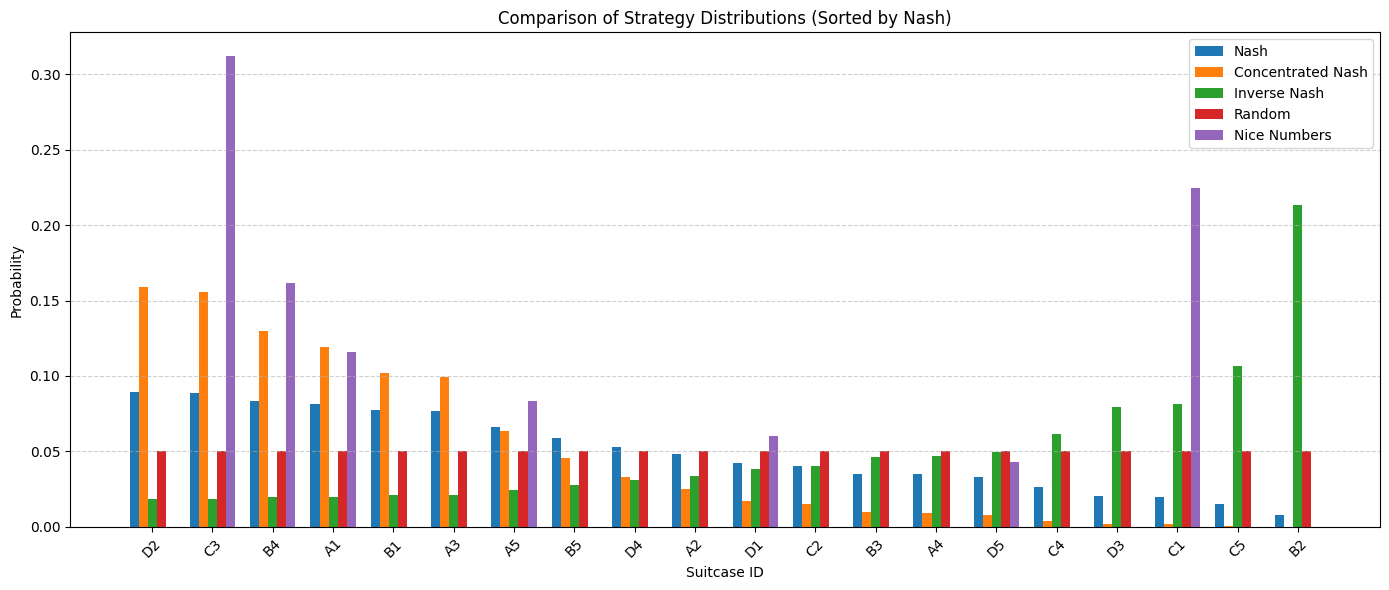

In [141]:
# Sort by Nash probability
suitcases_sorted_plot = suitcases_strats.sort_values("nash", ascending=False).reset_index(drop=True)
x = np.arange(len(suitcases_sorted_plot))
labels = suitcases_sorted_plot["id"]

# Plot settings
plt.figure(figsize=(14, 6))
width = 0.15

# Bar plots side by side
plt.bar(x - 2*width, suitcases_sorted_plot["nash"], width, label="Nash")
plt.bar(x - width, suitcases_sorted_plot["concentrated_nash"], width, label="Concentrated Nash")
plt.bar(x, suitcases_sorted_plot["inverse_nash"], width, label="Inverse Nash")
plt.bar(x + width, suitcases_sorted_plot["random"], width, label="Random")
plt.bar(x + 2*width, suitcases_sorted_plot["nice"], width, label="Nice Numbers")

# Formatting
plt.xticks(x, labels, rotation=45)
plt.xlabel("Suitcase ID")
plt.ylabel("Probability")
plt.title("Comparison of Strategy Distributions (Sorted by Nash)")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [142]:
# --- Strategy Weights ---
weights = {
    "nash": 0.55,
    "concentrated_nash": 0.125,
    "inverse_nash": 0.05,
    "random": 0.15,
    "nice": 0.125,
}

# --- Weighted Sum to Compute Predicted Density ---
suitcases_strats["predicted_density"] = (
    weights["nash"] * suitcases_strats["nash"] +
    weights["inverse_nash"] * suitcases_strats["inverse_nash"] +
    weights["random"] * suitcases_strats["random"] +
    weights["nice"] * suitcases_strats["nice"]
) * 100  # scale to percentage

suitcases_strats["EV"] = (
    BASE_TREASURE * suitcases_strats["mult"]
    / (suitcases_strats["inhab"] + suitcases_strats["predicted_density"])
)

suitcases_strats.sort_values("EV", ascending=False).reset_index(drop=True)

,id,mult,inhab,picks,density,EV,nash,concentrated_nash,inverse_nash,random,nice,predicted_density
0,D2,79,5,0,0,73378.966183,0.08954,0.159060,0.018266,0.05,0.000000,5.766028
1,D4,47,3,0,0,68911.577943,0.05302,0.033024,0.030847,0.05,0.000000,3.820334
2,A3,83,7,0,0,68766.924982,0.07660,0.099586,0.021351,0.05,0.000000,5.069756
3,B1,89,8,0,0,67928.943087,0.07720,0.101944,0.021185,0.05,0.000000,5.101926
4,A2,50,4,0,0,65990.602490,0.04832,0.024997,0.033847,0.05,0.000000,3.576836
5,C2,40,3,0,0,64647.309644,0.04066,0.014894,0.040224,0.05,0.000000,3.187419
6,B5,90,10,0,0,63685.152981,0.05897,0.045436,0.027734,0.05,0.000000,4.132022
7,A4,31,2,0,0,63303.337937,0.03476,0.009306,0.047051,0.05,0.000000,2.897056
8,A5,60,4,0,0,62861.212921,0.06598,0.063643,0.024788,0.05,0.083360,5.544837
9,A1,80,6,0,0,62636.983774,0.08131,0.119108,0.020114,0.05,0.115951,6.772007
